<a href="https://colab.research.google.com/github/duchaba/aud3_augmentation_data_deep_dive/blob/main/AUD3_augmentation_data_deep_dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# OPTIONAL
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts (from line #10 to #17) and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%js
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #fd7e14 !important;border-radius: 10px 0 0 10px;padding: 1em 1em 1em 1em;border-bottom: 1px solid #343845}"
css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;}"
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;font-size:120%;} h3{color:#fd7e14 !important;font-size:120%;} h4{color:#6610f2 !important;}"
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));


<IPython.core.display.Javascript object>

# 1.0 |- Introduction | Augmentation Data Deep Dive (AUD3)

Welcome to the “Augmentation Data Deep Dive” (AUD3) project. It is another journey in the “Demystify AI” series. 

The only thing these journeys have in common is the problems are taken from the real-world Artificial Neural Network (ANN) project. I have worked on them, coded them, cried over them, and sometimes had a flash-of-insight or an original thought about them.

The journeys are a fun and fascinating insight into the daily working of an AI Scientist and Big-Data Scientist. They are for colleagues and AI students, but I hope that you, a gentle reader, would enjoy it too. 

The logic behind data augmentation is uncomplicated. You need more pictures to increase the ANN model accuracy, and data augmentation gives you more images. 

The AUD3 is a hackable, step-by-step Jupyter Notebook. It is for learning about data augmentation and selecting the correct parameters in the ANN image-classification and image-segmentation projects. You can skip ahead to the result-cells and not read the math and the code-cells. The math is elementary, and coding is straightforward logic, so try it out. You might enjoy “hacking” along the journey. 

Data augmentation increases the training images by a factor of 2 to 16 or more. For ANN, that means the model achieves better accuracy with more epoch and without over-fitting. 

For example, I was working on an AI project for a large casino hotel. The goal is to classify every customer into one of the 16 categories as they walk through the door. In other words, it is not to identify that guy walking through the door is “Duc Haba,” but to classify him as a “whale (A-1)” category, i.e., a big spender. 

As you have guessed, the first and most significant problem is the lack of labeled pictures. I need millions of tagged photos because of human diversity in race, ethnicity, clothing, different camera angle, and so on. 

ANN is not a ruled-based expert system. For example, a person wearing a Rolex watch is an “A-1”, or a guy with no shoe and no shirt is a “D-4” category. ANN does not use rules, so it needs millions of labeled images to train and to generalize so the ANN model can classify a guy who enters the casino for the first time correctly. In ANN’s lingual, it means the ANN model is not over-fitting. 

I classify the AUD3 as a "sandbox" project. In other words, it is a fun, experimental project focusing on solving one problem.






><center><h2><i>So if you are ready, let's take a collective calming breath …  … and begin.</i></h2></center>

# 2.0 |- The Journey




- As with the previous journey, the first step is to choose and name your dog companion. With the project code name AUD3, the natural name has to be “Wallaby.” 

- Typically a dog name is chosen, e.g., "Lefty," "Roosty," or "Eggna," but be warned, don't name it after your cat because a "cat" will not follow any commands.

- If you are serious about learning augmenting data, start hacking by changing the companion name to your preference. Jupyter notebook allows you to add notes, add new codes, and hack Wallaby’s code. 

- If you are a friend tagging along, you will like Wallaby. He is a friendly, helpful dog. He will do all the tedious work in good spirits, and he likes to hop around. 

- As a good little programmer, Wallaby (or insert your companion name here) starts by creating an object or class.

![wallaby](https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/wallaby3.jpg?raw=true)

## 2.1 | Wallaby's "River" Coding Style

- Wallaby uses the "river" coding style.

- The style uses a full library name, sub-class, and following by the function name. Jupyter notebook has auto-complete, so Wallaby would not misspell long variable and function name. 

- Wallaby is NOT using the global-space, such as "import numpy *" or using the shorten name like "import matplotlib.pyplot as ptl.” Instead he is using the full {river} name as in “numpy.random.randint().”

- Furthermore, Wallaby shies away from using Python language-specific syntax shorthand, such as the “assigned if” statement construct. He likes to write the Python code using standard Python libraries and not relying on exotic packages. 

- The primary reason for using the “river” coding style coupled with a descriptive naming convention is that it is easier to read, hack, and translate to Swift or Javascript.

- For any sandbox project, Wallaby is in the exploration mode, and therefore, he will refactor and optimize the code afterward. When Wallaby using [Atom IDE](htpps://atom.io) to upload the code to GitHub, he may refactor them to make them run faster, but not for syntax compaction or syntax shorthand. 


## 2.2 | Wallaby Class

In [ ]:
# import standard libraries
import numpy
import pathlib
import os
import pandas
import matplotlib

In [ ]:
class AUD3(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Duc Haba"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  #
  # dance
  def dance_happy(self):
    char = "        _=,_\n    o_/6 /#\\\n    \\__ |##/\n     ='|--\\\n       /   #'-.\n"
    char = char + "       \\#|_   _'-. /\n        |/ \\_( # |\" \n       C/ ,--___/\n"
    print(char)
    self._ph()
    return
# ---end of AUD3 class

In [ ]:
# Let start
wallaby = AUD3("Wallaby")

---------------------------------------- : ----------------------------------------
                              Hello from : AUD3
                               Code name : Wallaby
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------


In [ ]:
# dance baby dance
wallaby.dance_happy()

        _=,_
    o_/6 /#\
    \__ |##/
     ='|--\
       /   #'-.
       \#|_   _'-. /
        |/ \_( # |" 
       C/ ,--___/

---------------------------------------- : ----------------------------------------


- The following is a clean version. Wallaby cleans up the tried-and-errors cells, but please don't let it stop you from inserting your code-cells and notes as we make this journey together. 

- When copying the code into the Atom's project, Wallaby would add the methods during the class definition, but in a notebook, he will hack-it and add new functions as need it. 

In [ ]:
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator

## 2.3 | Detour to Find Our Friend Monty

- Monty is like Wallaby. He is a Python class refactored in the Atom project and stored in GitHub. 

- Monty is an alpha-dog, and therefore, he follows the same methodology. Hacked it in a Jupyter notebook and then copy and refactor in a Python Atom project.

- Monty is not a public Github project at this stage. However, Monty's code exists in many of Duc Haba's sandbox projects on Github.

- Monty uses "[fast.ai](https://fasta.ai)" library version 1.0.62.x from Jeremy Howard, Rachel Thomas, and Sylvain Gugger. Fast.ai library uses PyTorch version 1.6.x and Python 3.6.9.

- For this journey, Monty ability to draw 2D, 3D graphs, and image-cleaning will be handy. They were from previous journies, the "[Demystify Python 2D Charts](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/)," and the "[3D Visualization](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/)" sandbox projects.

In [ ]:
%%capture out_1
# load in fastai and pytorch. It is optional if are coding on your labtop
# load in fastai at May 1 2020 version
!pip install --upgrade git+https://github.com/duchaba/fastai.git
# !pip install --upgrade git+https://github.com/duchaba/monty_NOT_AVAILABLE

# import Monty and create a monty instant. The preference is NOT using global space
import d0hz.fastai_util 
monty = d0hz.fastai_util.base_monty()

In [ ]:
# double checked
monty.print.sys_info()

---------------------------------------- : ----------------------------------------
                             System time : 2020/12/11 21:55
                                Platform : linux
                          Python version : 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
                         PyTorch version : 1.7.0+cu101
                     Fastai version is:  : 1.0.62.dev0
                           Monty version : 0.6.0
                               CPU count : 4
                              *CPU speed : NOT available
                               RAM total : 25.51 Gb
                                RAM free : 24.13 Gb, 94.6%
                                GPU-Cuda : True
                        Disk space total : 147.15 Gb
                         Disk space free : 114.57 Gb, 77.9%
                      Current directory: : /content
             Python import packages path : Full path below...
                                       + : 
                     

## 2.4 | Fetch Images Data

- Wallaby has a companion named Monty. He will do all the dirty works that do not directly pertain to this journey. If we spend time teaching Wallaby, then it will distract from the AUD3 journey.

- Wallaby encourages you to hack the notebook, and use your image data set.

- His first task is as follows.

1. Fetch the farm animal image set.

2. Fetch the city image set.

3. Fetch the people faces image set.

4. Fetch the satellite image set.

- Wallaby randomly pulls the images from "Google" or "Bing" image-searches. He uses the Chrome web store "[Download All Images](https://chrome.google.com/webstore/detail/download-all-images/nnffbdeachhbpfapjklmpnmjcgamcdmm)" extension to download and pack them into a zip file. 

- Wallaby claims <u>no rights</u> on these pictures. He uses them only for research purposes. 


In [ ]:
import requests
import zipfile
# fetch data from url
@add_method(AUD3)
def _fetch_external_file(self,src_url, dst_path):
  ext_file = requests.get(src_url, allow_redirects=True)
  self._pp("Response Status Code " + str(ext_file.status_code), ext_file.reason)
  local_file = open(dst_path,mode="wb")
  local_file.write(ext_file.content)
  local_file.close()
  return dst_path
#
#
# unzip file
@add_method(AUD3)
def _unpack_zipfile(self, src,dst):
  with zipfile.ZipFile(src, "r") as zip_ref:
    zip_ref.extractall(path=dst)
  return
#
#
# fetch data
@add_method(AUD3)
def fetch_data(self):
  #set up
  self.img_ext_faces_url = "https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/faces.zip?raw=True"
  # create the "data"
  self.data_path = pathlib.Path("data")
  if os.path.isdir(self.data_path) == False:
    os.mkdir(self.data_path)
  dst = self.data_path.joinpath("faces.zip")
  # header
  self._ph()
  self._pp("Fetch", "Image data sets")
  self._pp("Destination: "+str(dst), "Source: " + self.img_ext_faces_url)
  # fetch faces
  self.img_path = self.data_path.joinpath("img")
  self._fetch_external_file(self.img_ext_faces_url,dst)
  self._unpack_zipfile(dst,self.img_path)
  self._pp("Unpack "+str(dst) + " at", self.img_path)
  # fetch cityscape
  self.img_ext_cityscape_url = "https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/cityscape.zip?raw=True"
  dst = self.data_path.joinpath("cityscape.zip")
  self._pp("Destination: "+str(dst), "Source: " + self.img_ext_cityscape_url)
  self._fetch_external_file(self.img_ext_cityscape_url,dst)
  self._unpack_zipfile(dst,self.img_path)
  self._pp("Unpack "+str(dst) + " at", self.img_path)
  #
  # fetch landscape
  self.img_ext_landscape_url = "https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/landscape.zip?raw=True"
  dst = self.data_path.joinpath("landscape.zip")
  self._pp("Destination: "+str(dst), "Source: " + self.img_ext_landscape_url)
  self._fetch_external_file(self.img_ext_landscape_url,dst)
  self._unpack_zipfile(dst,self.img_path)
  self._pp("Unpack "+str(dst) + " at", self.img_path)
  #
  self._ph()
  return 

In [ ]:
# do it
wallaby.fetch_data()

---------------------------------------- : ----------------------------------------
                                   Fetch : Image data sets
             Destination: data/faces.zip : Source: https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/faces.zip?raw=True
                Response Status Code 200 : OK
                Unpack data/faces.zip at : data/img
         Destination: data/cityscape.zip : Source: https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/cityscape.zip?raw=True
                Response Status Code 200 : OK
            Unpack data/cityscape.zip at : data/img
         Destination: data/landscape.zip : Source: https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/landscape.zip?raw=True
                Response Status Code 200 : OK
            Unpack data/landscape.zip at : data/img
---------------------------------------- : ----------------------------------------


- That was easy-peasy-lemon-squeezy. Wallaby is an excellent fetching-dog. Imagine if you choose a cat as your companion on this journey. First, a cat will not listen to the command "fetch." If a miracle of miracle happens, a cat follows your order. Then he will most likely come back with a dead bird or not come back at all.

## 2.5 | Inspect Images

- Wallaby relies on Monty to do the photos inspection and cleaning. It is a prelude to doing data augmentation, but it is not essential to teach Wallaby. It would be distracted from the AUD3 journey. 

- Send Wallaby’s human companion an email or post a comment if you want Wallaby to do a Jupyter notebook sandbox project about image inspection and cleaning.

- Wallaby repeatedly runs below code-cells to see a random image thumbnail.


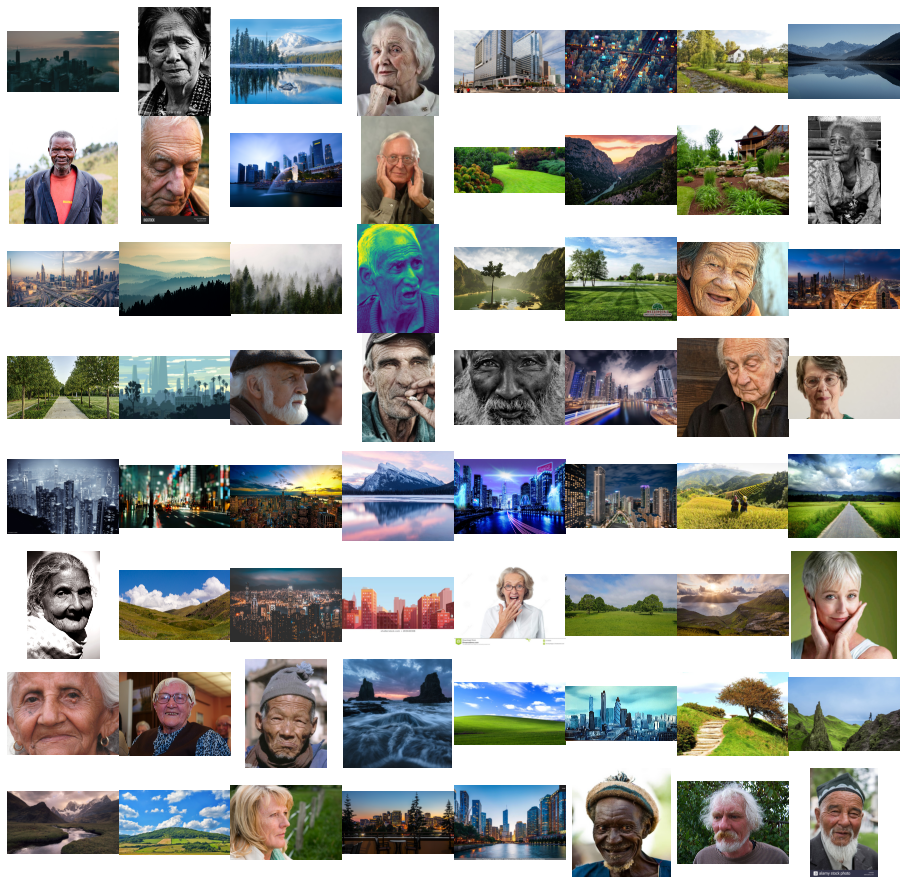

In [ ]:
# view images thumbnail (run it repeatly)
monty.draw.thumbnail_collage(wallaby.img_path)

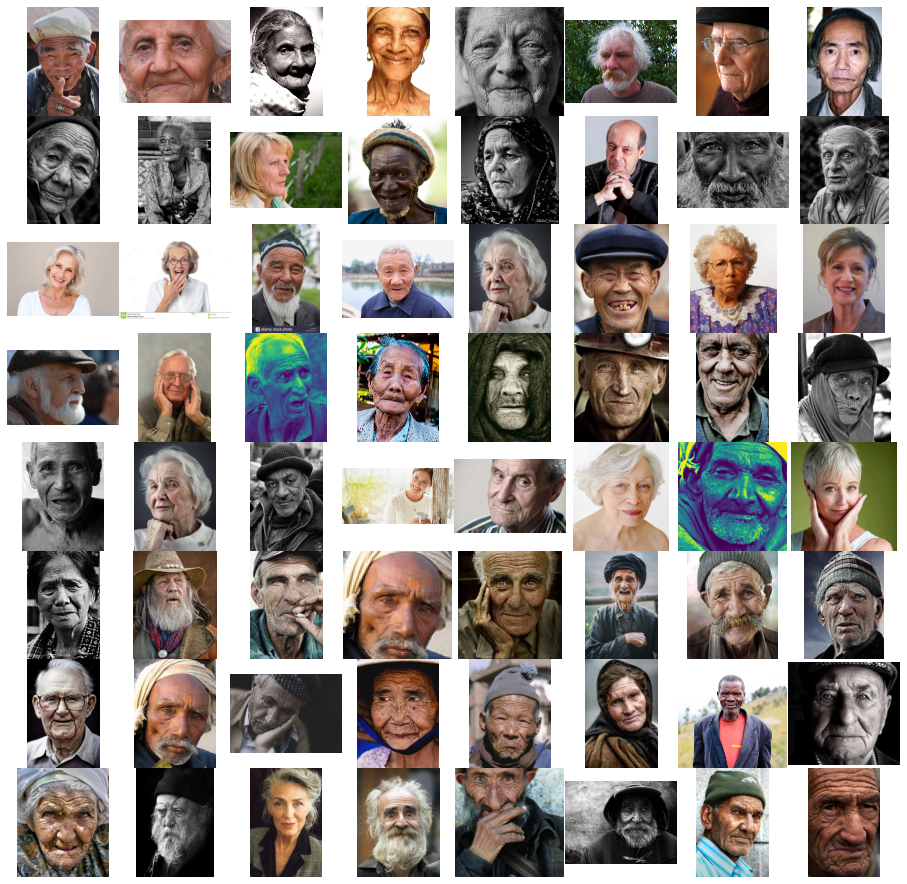

In [ ]:
# view just faces thumbnail (run it repeatly)
monty.bag.img_files = None # reset the thumbnail collection
monty.draw.thumbnail_collage(wallaby.img_path.joinpath("faces"))

- Wallaby wants to inspect one file at a time.

In [ ]:
# print inspect one image (randomly)
@add_method(AUD3)
def print_inspect_image(self):
  files = monty.fetch.file_name(self.img_path)
  max = len(files)
  idx = numpy.random.randint(0,max)
  monty.print.inspect_image(files[idx]) 
  monty.draw.images(files[idx])
  return

---------------------------------------- : ----------------------------------------
 Image size (row/h, col/width, [chanel]) : (1024, 683, 3)
                              Image mode : RGB
                           Channel value : 3
                        (top left 8x8) R : Value below...
                                       + : [43 48 56 63 68 71 73 74]
                                       + : [49 53 60 66 70 73 75 76]
                                       + : [56 59 65 69 73 75 77 78]
                                       + : [61 63 68 71 74 77 79 80]
                                       + : [63 65 69 73 76 78 80 82]
                                       + : [65 68 72 75 78 80 82 83]
                                       + : [69 72 76 79 81 83 84 85]
                                       + : [72 75 79 82 84 85 85 86]
                        (top left 8x8) B : Value below...
                                       + : [66 71 79 86 91 94 96 97]
                             

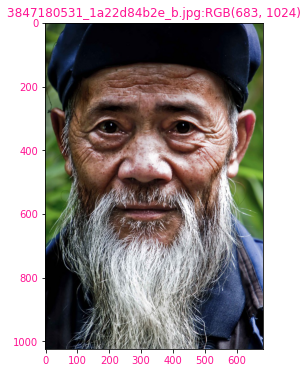

In [ ]:
# do it (run it repeatly)
wallaby.print_inspect_image()

-a 

## 2.6 | Clean The Images (Optional?)

- Data cleaning and data normalization may be optional in some cases. Still, Wallaby found that the ANN model will train faster with better accuracy when all images are the same size and square shape.

- Data cleaning does not affect the data augmentation outcome, but Wallaby is an organized nutcase. He likes things square and needly lineup. And since Monty knows how to do cleaning, it will not distract from the journey goals. 

- Once again, if you like to see an in-depth Jupyter Notebook about data cleaning (or cleansing), labeling, aggregating, identifying, and wrangling, contact Wallaby human companion.

- Wallaby starts with picking the image size. It is not as easy as it sounds because the photo’s size is tightly coupled with the goal of the ANN classification model and the subject matter. If the goal is simple as to classify handwriting digit, then 64x64 pixel is sufficient.

- What is the optimal photo size for ANN classification of the ethnicity of older adults faces? Clearly, the 2024x3040 pixel size is too big, and the 64x64 pixel size is too small. Should it be 400x400, 800x800 or 1024x1024 pixel size? Or does it even matter if Wallaby chooses any of the mid-range sizes? Is higher resolution always yield a better accuracy rate? There is no clear answer to any of the above questions. 

- There are practical considerations that need to take into account. The photo size 2024x3040 pixel yields 6,152,960 input nodes per image. When Wallaby multiplies the number of input nodes with the batch-size, the epoch count, and the number of layers in the ANN architecture, the result is a pretty large number. There is no GPU card with that big of RAM available on the open market. Eight, twelve, and sixteen Gigabytes of GPU RAM is the norm for ANN projects. 

- Wallaby hates to willy-nilly choose a size because he is trained as a canine computer scientist and not a psychologist. Maybe he should wait for his friend Magpiena to complete her master thesis. :-)

- For now, Wallaby chooses the size 448x448 pixel size because ResNet architecture uses the formular (2^n * 7) where “n” is an integer starting with one, i.e. (2^6 * 7) = 448. Wally wants all photo to be square and centered. 



In [ ]:
# Monty clean
wallaby.img_size = 448
monty.clean.square_images(wallaby.img_path, wallaby.img_size)

---------------------------------------- : ----------------------------------------
                               Directory : data/img
                       Result image size : 448x448
               Total squared image count : 222
---------------------------------------- : ----------------------------------------


True

- Wallaby is right. Monty cleans well. While at it, the file names are too long, and there is no embedded information in the file name, so Wallaby wants to make them all nice and tidy. :-)



In [ ]:
# Monty normalize file name
@add_method(AUD3)
def clean_normalize_filename(self):
  monty.clean.normalize_name(self.img_path.joinpath("faces"),head="face")
  monty.clean.normalize_name(self.img_path.joinpath("cityscape"),head="city")
  monty.clean.normalize_name(self.img_path.joinpath("landscape"),head="land")
  return

In [ ]:
# shorten and tidy file name
wallaby.clean_normalize_filename()

---------------------------------------- : ----------------------------------------
                 Total file rename count : 76
                           Original name : data/img/faces/Makeup-for-elderly-women.jpg
                                New name : data/img/faces/face-75.jpg
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                 Total file rename count : 72
                           Original name : data/img/cityscape/New-York-City-cityscape-WW-47574011.jpeg
                                New name : data/img/cityscape/city-71.jpeg
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                 Total file rename count : 74
                           Original name : data/img/landscape/landscape-hero-bg-1.jpg
                     

- Wallaby double-checks Monty's handy works.

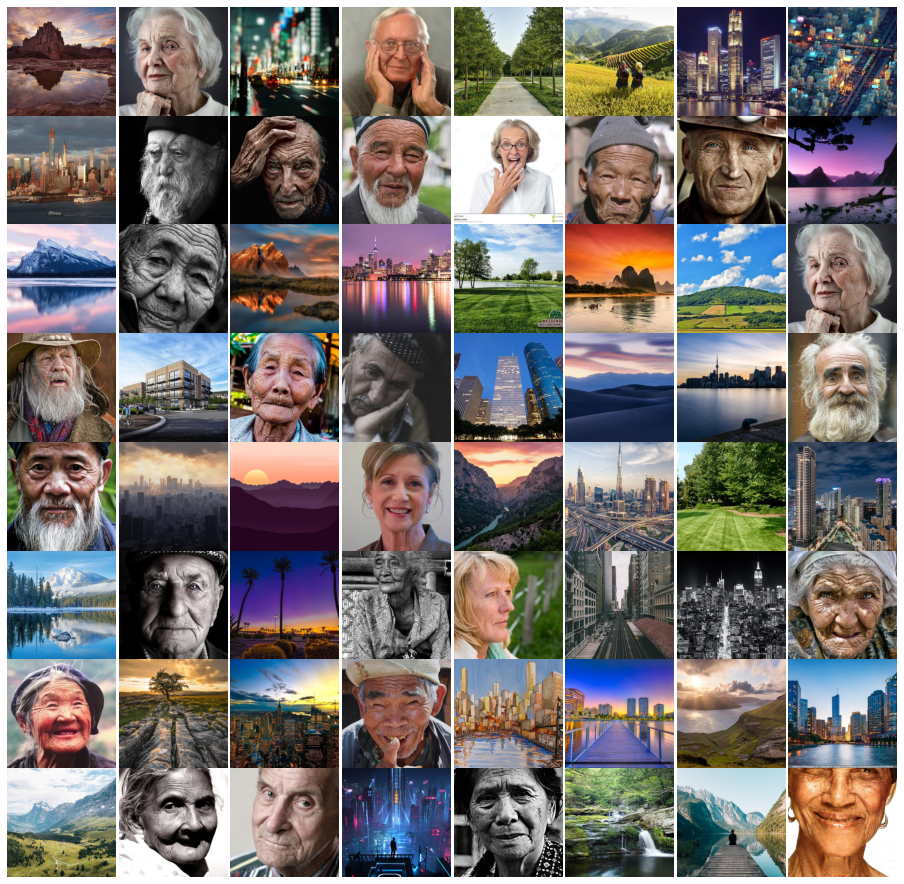

In [ ]:
# double check via thumbnail (run it repeatly)
# monty.bag.img_files = None
monty.draw.thumbnail_collage(wallaby.img_path)

---------------------------------------- : ----------------------------------------
 Image size (row/h, col/width, [chanel]) : (448, 448, 3)
                              Image mode : RGB
                           Channel value : 3
                        (top left 8x8) R : Value below...
                                       + : [233 232 231 231 233 233 232 231]
                                       + : [233 231 230 231 232 233 232 230]
                                       + : [232 231 230 230 232 232 231 230]
                                       + : [233 231 230 231 232 233 232 231]
                                       + : [235 233 232 233 235 235 234 233]
                                       + : [238 237 236 236 238 238 237 236]
                                       + : [242 240 239 240 241 242 241 239]
                                       + : [244 242 241 242 243 244 243 241]
                        (top left 8x8) B : Value below...
                                   

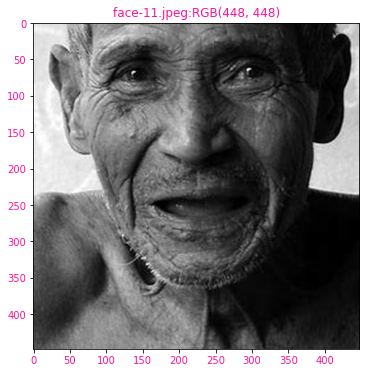

In [ ]:
# inspect one photo at a time (run it repeatly)
wallaby.print_inspect_image()

- That is nice. All images are squared, the same size, centered, and neatly named, e.g., “city1.jpg, city2.jpg, face1.jpg, face2.jpg, land1.jpg, land2.jpg”, and so on. Thank you, Monty.

- Wallaby ready to dive into the heart of the journey. He will turn the 222 images into thousands of photos without compromised the subject.
 



## 2.8 Milestone

- Henna is happy to see the milestone mark. She has completed the AUD3 journey, except for a quick detour to hyper-parameters.

- At the beginning of the journey, we promised to show Henna how the movie reviews affect the hyper-parameters. 

In [ ]:
#

## 2.10 Wrap Up 

- We are back from the hyper-parameters detour, and Henna is happy heading back to the home base. Henna has been on a similar journey with real-world data. It was for a national retail customer feedback blog site. The difference is that Henna spends more time cleaning, labeling, augmenting, and segmenting customer feedback. In other words, it is not as normalized as the IMDB movie reviews.

- Henna starts by downloading the IMDB movie reviews. She looks at the data structure, counting words, and drawing graphs. The combined word-counts and standard deviation charts in section #2.3 are very useful. 

- Henna moves forward to reading the movie reviews, the “README” file, and other supporting files. She found a few issues, such as HTML-tags and unprintable characters that need to be clean. 

- After cleaning the movie reviews, Henna splits the “labeled” data to “75-15-10”, i.e., 75% for the training, 15% for the validating, and 10% for the testing. The “75-15-10” split might disqualify Henna in a competition, but it is a balanced distribution for a real-world project. 

- Hanna did not cheat. She didn’t use the “validation” movie reviews for “training,” and the “test” data are kept separate. The “75-15-10” hand-drawn bar chart in section #2.5 confirmed that Henna did it correctly.

- At first glance at the tokenizer result, Henna was panic because the system tokenizes 47% of all the available unique words. It implies the system dropped every other word in the movie reviews. 

- However, through Henna’s original thinking and graphs, the “tokenizer charts” in section #2.6.3C show that in actuality, for the average 232 words movie review, the system only discards 1.62 words. The “tokenizer charts” conclusively prove that the system discards 0.7% per movie review. 

- Henna discovered a few intentional biases in the movie reviews. In her biases discussion, she explains how to correct them and encourages data scientists to document their data’s intentional biases. 

- In the last part of the journey, Henna create the “next word” data-bunch and “sentiment classification” data-bunch. She inspects each step in the data-bunch creation. 

- It is an enjoyable journey, and Henna wishes you to be back for the next adventure.


## 2.11 Bonus Section, NLP Model Loss and Accuracy Result

- Henna was asked about the NLP model training accuracy results using her two data-bunches, so she asked “Spooky,” who is from the Jupiter notebook that does the model training. 

- Hanna happy to report that the final accuracy rate is 96.800%. Compared to the Kaggle IMDB competition about two years ago, the “[ml410-IMDb](https://www.kaggle.com/c/ml410-imdb/leaderboard)” Private Leaderboard is 90.528%.

- Granted, Spooky is using the Fast.ai library, which included the last two years advances in CNN, but to beat the leader board by 6.272% is a substantial margin where Kaggle competition winners are separated tenth or hundredth of a percentage. 

- Spooky’s Jupyter notebook is not (yet) published on the public GitHub, but Henna has permission to includes the result here. 

- Using Panda, the raw data are as follows. The system recalculates the learning rate after each unfreezing-layers training session. In addition, Henna splits the clean-data into the “75-15-10” split. See section #2.5 above.


In [ ]:
# read it
henna.df_result = pandas.read_csv("spooky_result.csv")

In [ ]:
# display it
henna.df_result

- Henna likes to draw, so here is a beautiful Loss and Accuracy’s graph.

In [ ]:
# draw loss and accuracy training graph
@add_method(AUD3)
def draw_loss_acu_result(self,is_logr=False):
  try:
    #set up train set
    row = len(self.df_result)
    mx_accuracy = numpy.ones((row,2))
    mx_accuracy[:,0] = numpy.arange(0,row,1)
    mx_accuracy[:,1] = self.df_result["accuracy"]
    # set up train_loss
    mx_train_loss = mx_accuracy.copy()
    mx_train_loss[:,1] = self.df_result["train_loss"]
    #
    mx_valid_loss = mx_accuracy.copy()
    mx_valid_loss[:,1] = self.df_result["valid_loss"]
    # 
    mx_1_line = numpy.zeros((2,2))
    mx_1_line[0,1] = 1.0
    mx_1_line[1,0] = row - 1
    mx_1_line[1,1] = 1.0
    # 
    #
    # draw it
    frame, pic = monty.fetch.graph_canvas()
    monty.draw.graph_line(pic,mx_1_line,is_grid=True)
    monty.draw.graph_line(pic,mx_accuracy,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.yellow)
    monty.draw.graph_line(pic,mx_valid_loss,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.blue)
    monty.draw.graph_line(pic,mx_train_loss,is_shade_area=True,shade_alpha=0.7,shade_color=monty.bag.color.teal)
    #
    #
    x = "Epoch"
    y = "Loss and Accuracy"
    h = "Accuracy (Yellow), Train Loss (Teal), Valid Loss (Blue)"
    xl = list(map(str, list(self.df_result["epoch"])))
    monty.draw.graph_label(pic,xlabel=x, ylabel=y, head=h)
    pic.set_xticks(mx_accuracy[:,0])
    pic.set_xticklabels(xl)
    if (is_logr):
      pic.set_yscale('log')
    pic.grid(True)
    frame.show()
  except:
    self._pp("**Error, can not draw graph", "Did you create my buddy, Monty?")
  return
# set_xticklabels

In [ ]:
# do it
henna.draw_loss_acu_result()

In [ ]:
# do it using logarithmic scale
henna.draw_loss_acu_result(is_logr=True)

In [ ]:
monty.draw.graph_line??

><h2><center>The end.</center></h2>

# 3 - Conclusion




The “AUD3” is a typical Jupyter notebook in my workday. The difference is that the actual notebooks are messier, containing many detours, deadends, and mistakes.

I choose the IMDB data because I can’t share the actual customer data, and I am pleasantly surprised how clean are the movie reviews. The IMDB folks have rightfully deserved the credits for making the NLP data freely available. 

I discovered that graphing NLP data is my secret weapon, especially the “tokenizer graph per file.” I can’t believe that no one does it before. 

Typically, I spend more time cleaning, augmenting, segmenting, and labeling the NLP data in a real-world project. Furthermore, the data scientists and project managers rarely document intentional biases. They are not hard to spot once you compared with the project objectives.

As with the previous “sandbox” project, [the 3D visualizing](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/), I encourage everyone should publish articles or lessons using the Jupyter notebook. The readers can hack the notebook and make it their own. That’s is where learning truly takes root. It is by reading and doing it.

> <h2>“A doer of deeds…”</h2>

I am looking forward to seeing you again in the next “sandbox” adventure, and if you read this on LinkedIn or GitHub, give me a “thumbs up” and send me feedback.

- LinkedIn, "Demystify Python 3D Visualization -- A Hackable Step-by-step Jupyter Notebook", (add link)

- If you read this on LinkedIn, what are you waiting for? Heading over to Github, using Google Collab or your favorite Jupyter notebook option, and hacking away. (add link)

In [ ]:
# end of jupyter notebook